In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [9]:
df=pd.read_csv("/content/loan.csv")
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [15]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


In [16]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values
x

array([['Male', 'No', '0', ..., 1.0, 4.986425672954842, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [17]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In [20]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_x=LabelEncoder()
for i in range(0,5):
  X_train[:,i]=LabelEncoder_x.fit_transform(X_train[:,i])
X_train[:,7]=LabelEncoder_x.fit_transform(X_train[:,7])

In [21]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [22]:
LabelEncoder_y=LabelEncoder()
y_train=LabelEncoder_y.fit_transform(y_train)

In [23]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [24]:
for i in range(0,5):
  X_test[:,i]=LabelEncoder_x.fit_transform(X_test[:,i])
X_test[:,7]=LabelEncoder_x.fit_transform(X_test[:,7])
y_test=LabelEncoder_y.fit_transform(y_test)

In [25]:
X_test,y_test

(array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
        [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
        [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
        [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
        [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
        [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
        [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
        [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
        [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
        [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
        [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
        [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
        [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
        [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
        [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
        [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
        [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
        [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
        [0, 0, 0, 0, 5, 1.0, 4.53259949315325

In [34]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
y_pred=dtc.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

accuracy of decision tree is : 0.8292682926829268
Precision: 0.822429906542056
F1 Score: 0.8934010152284264


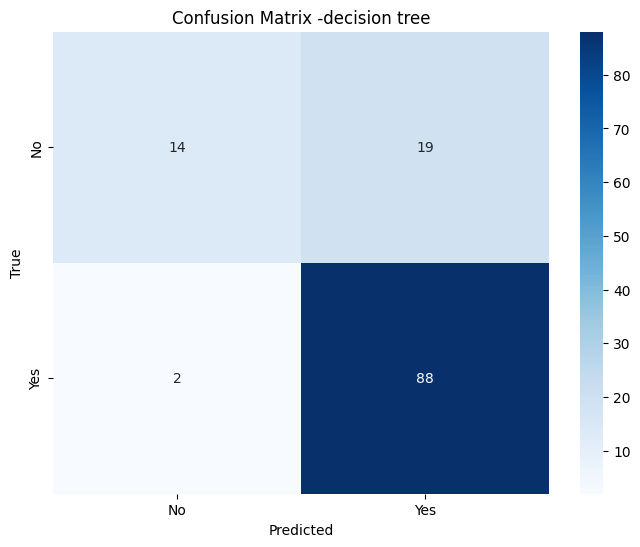

Mean Squared Error: 0.17073170731707318
R-squared: 0.13030303030303036


In [52]:
from sklearn import metrics
print("accuracy of decision tree is :", metrics.accuracy_score(y_pred,y_test))
from sklearn.metrics import accuracy_score, precision_score, f1_score,confusion_matrix
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -decision tree')
plt.show()
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC()
svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)

y_pred
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of svm:", accuracy)


precision = precision_score(y_test, y_pred)
print("Precision:", precision)


f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Accuracy of svm: 0.8292682926829268
Precision: 0.822429906542056
F1 Score: 0.8934010152284264
Mean Squared Error: 0.17073170731707318
R-squared: 0.13030303030303036


In [50]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)


y_pred = random_forest.predict(X_test)


accuracy = accuracy_score(y_pred, y_test)
print("Accuracy of random forest:", accuracy)


precision = precision_score(y_test, y_pred)
print("Precision:", precision)


f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)


Accuracy of random forest: 0.7804878048780488
Precision: 0.8247422680412371
F1 Score: 0.8556149732620321
Mean Squared Error: 0.21951219512195122
R-squared: -0.11818181818181817


In [54]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


y_pred = linear_reg.predict(X_test)



mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 0.1428033187973301
R-squared: 0.2725685487929942


Accuracy: 0.8292682926829268
Precision: 0.822429906542056
F1 Score: 0.8934010152284264


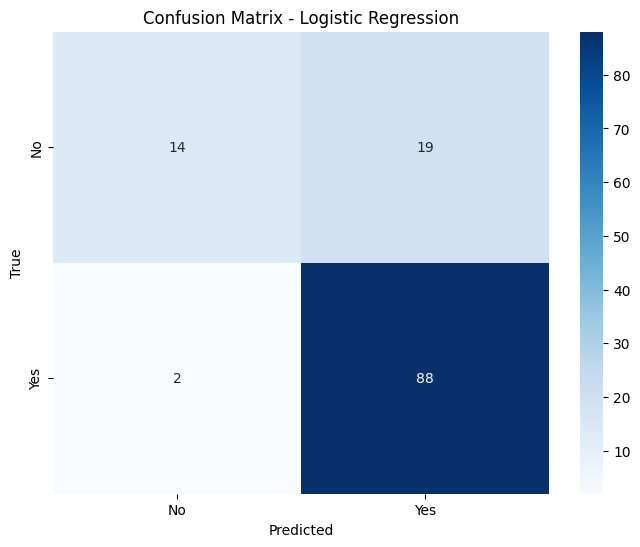

Mean Squared Error: 0.17073170731707318
R-squared: 0.13030303030303036


In [48]:
from sklearn.metrics import accuracy_score, precision_score, f1_score,confusion_matrix
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

y_pred = logistic_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)


f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

In [49]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Accuracy: 0.8292682926829268
Precision: 0.822429906542056
F1 Score: 0.8934010152284264
Mean Squared Error: 0.17073170731707318
R-squared: 0.13030303030303036


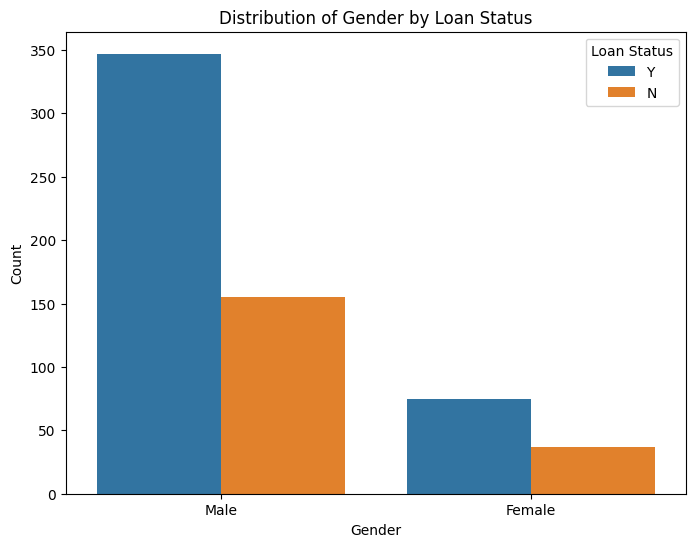

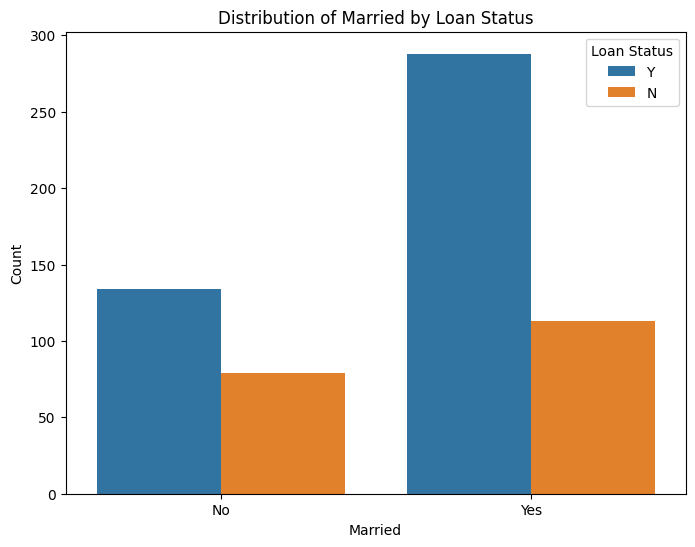

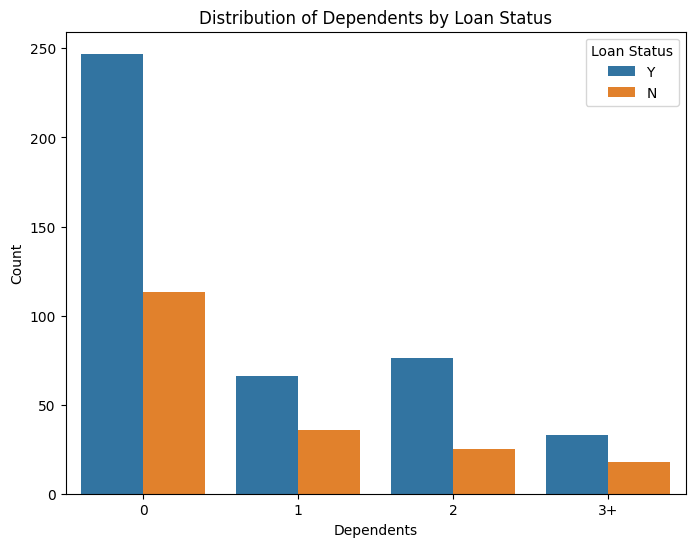

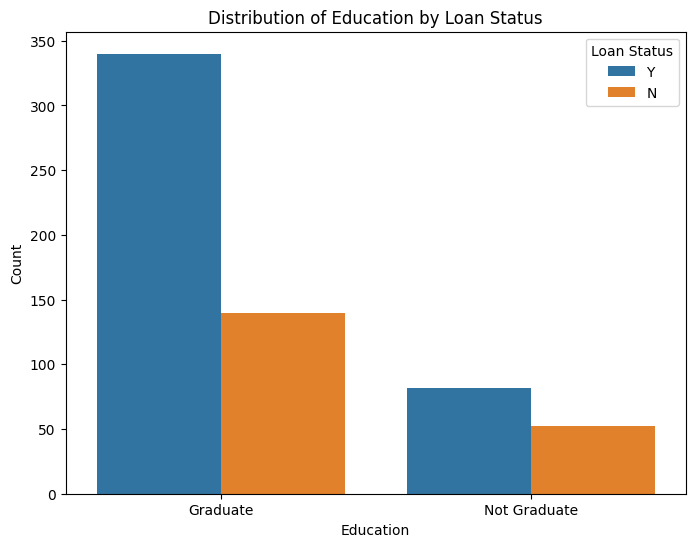

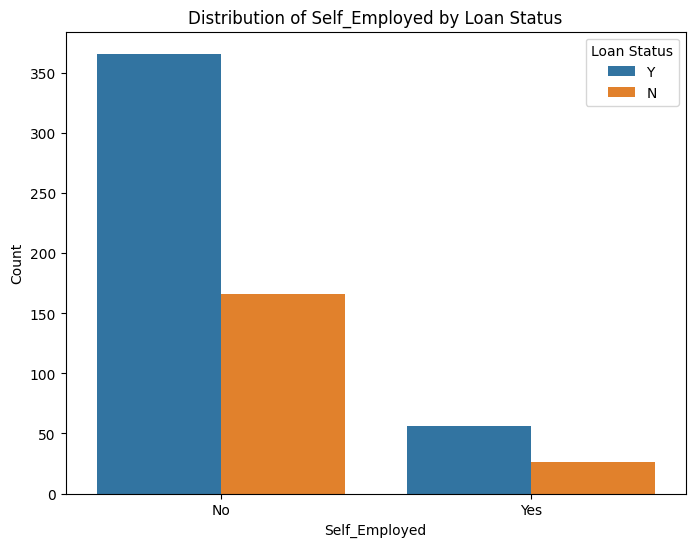

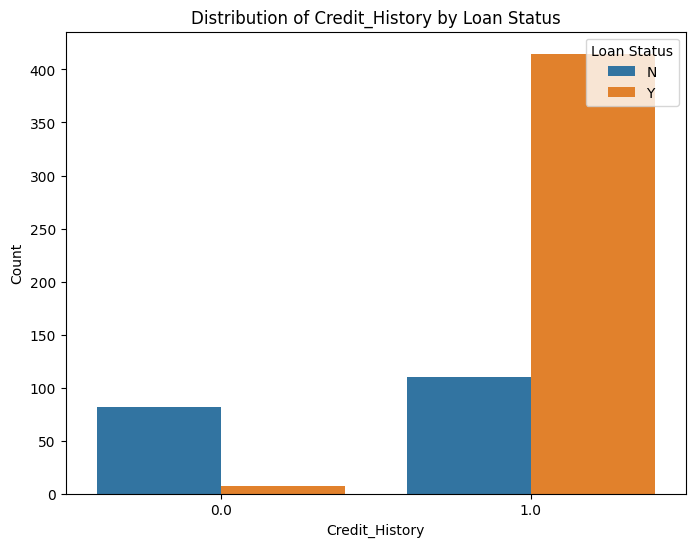

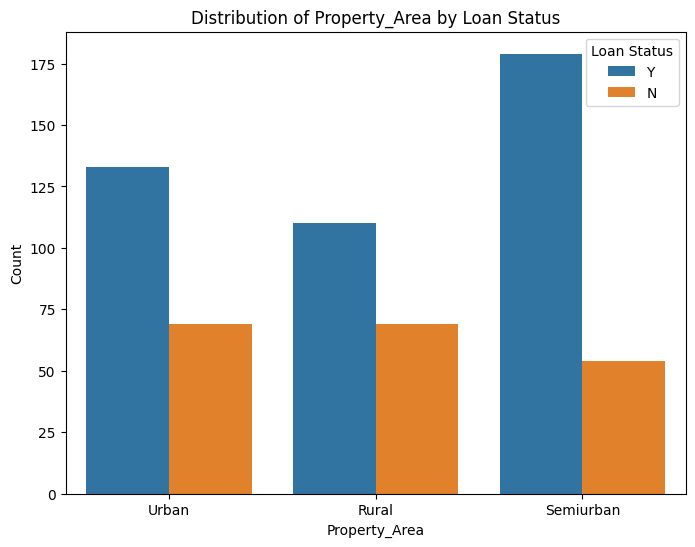

In [47]:
target_related_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

import matplotlib.pyplot as plt
import seaborn as sns
for column in target_related_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='Loan_Status', data=df )
    plt.title(f'Distribution of {column} by Loan Status')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right')
    plt.show()